In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import imblearn
print(imblearn.__version__)

from matplotlib import style
style.use('dark_background')
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
style.use('dark_background')

0.7.0


In [2]:
fightdata = pd.read_csv("fightdata.csv")
fightdata.columns = map(str.lower, fightdata.columns)

In [3]:
fightdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, r_fighter to r_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


In [4]:
fightdata.head()

,r_fighter,b_fighter,referee,date,location,winner,title_bout,weight_class,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_body_att,b_avg_body_landed,b_avg_clinch_att,b_avg_clinch_landed,b_avg_distance_att,b_avg_distance_landed,b_avg_ground_att,b_avg_ground_landed,b_avg_head_att,b_avg_head_landed,b_avg_kd,b_avg_leg_att,b_avg_leg_landed,b_avg_pass,b_avg_rev,b_avg_sig_str_att,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_att,b_avg_td_landed,b_avg_td_pct,b_avg_total_str_att,b_avg_total_str_landed,b_longest_win_streak,b_losses,b_avg_opp_body_att,b_avg_opp_body_landed,b_avg_opp_clinch_att,b_avg_opp_clinch_landed,b_avg_opp_distance_att,b_avg_opp_distance_landed,b_avg_opp_ground_att,b_avg_opp_ground_landed,b_avg_opp_head_att,b_avg_opp_head_landed,b_avg_opp_kd,b_avg_opp_leg_att,b_avg_opp_leg_landed,b_avg_opp_pass,b_avg_opp_rev,b_avg_opp_sig_str_att,b_avg_opp_sig_str_landed,b_avg_opp_sig_str_pct,b_avg_opp_sub_att,b_avg_opp_td_att,b_avg_opp_td_landed,b_avg_opp_td_pct,b_avg_opp_total_str_att,b_avg_opp_total_str_landed,b_total_rounds_fought,b_total_time_fought(seconds),b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_stance,b_height_cms,b_reach_cms,b_weight_lbs,r_current_lose_streak,r_current_win_streak,r_draw,r_avg_body_att,r_avg_body_landed,r_avg_clinch_att,r_avg_clinch_landed,r_avg_distance_att,r_avg_distance_landed,r_avg_ground_att,r_avg_ground_landed,r_avg_head_att,r_avg_head_landed,r_avg_kd,r_avg_leg_att,r_avg_leg_landed,r_avg_pass,r_avg_rev,r_avg_sig_str_att,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_att,r_avg_td_landed,r_avg_td_pct,r_avg_total_str_att,r_avg_total_str_landed,r_longest_win_streak,r_losses,r_avg_opp_body_att,r_avg_opp_body_landed,r_avg_opp_clinch_att,r_avg_opp_clinch_landed,r_avg_opp_distance_att,r_avg_opp_distance_landed,r_avg_opp_ground_att,r_avg_opp_ground_landed,r_avg_opp_head_att,r_avg_opp_head_landed,r_avg_opp_kd,r_avg_opp_leg_att,r_avg_opp_leg_landed,r_avg_opp_pass,r_avg_opp_rev,r_avg_opp_sig_str_att,r_avg_opp_sig_str_landed,r_avg_opp_sig_str_pct,r_avg_opp_sub_att,r_avg_opp_td_att,r_avg_opp_td_landed,r_avg_opp_td_pct,r_avg_opp_total_str_att,r_avg_opp_total_str_landed,r_total_rounds_fought,r_total_time_fought(seconds),r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,

In [5]:
check = fightdata['b_avg_body_att'] - fightdata['r_avg_opp_body_att']
print(check.describe())

count    3648.000000
mean        0.598782
std         8.242246
min       -69.900000
25%        -4.000000
50%         0.065801
75%         4.716346
max        39.500000
dtype: float64


In [6]:
fightdata.shape

(5144, 145)

In [7]:
fightdata['r_height_adv'] = fightdata['r_height_cms'] - fightdata['b_height_cms']
fightdata['b_height_adv'] = fightdata['b_height_cms'] - fightdata['r_height_cms']
fightdata['r_reach_adv'] = fightdata['r_reach_cms'] - fightdata['b_reach_cms']
fightdata['b_reach_adv'] = fightdata['b_reach_cms'] - fightdata['r_reach_cms']
fightdata['r_older_than'] = fightdata['r_age'] - fightdata['b_age']
fightdata['b_older_than'] = fightdata['b_age'] - fightdata['r_age']
fightdata.head()

#will use differences in fighter statistics for analysis

,r_fighter,b_fighter,referee,date,location,winner,title_bout,weight_class,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_body_att,b_avg_body_landed,b_avg_clinch_att,b_avg_clinch_landed,b_avg_distance_att,b_avg_distance_landed,b_avg_ground_att,b_avg_ground_landed,b_avg_head_att,b_avg_head_landed,b_avg_kd,b_avg_leg_att,b_avg_leg_landed,b_avg_pass,b_avg_rev,b_avg_sig_str_att,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_att,b_avg_td_landed,b_avg_td_pct,b_avg_total_str_att,b_avg_total_str_landed,b_longest_win_streak,b_losses,b_avg_opp_body_att,b_avg_opp_body_landed,b_avg_opp_clinch_att,b_avg_opp_clinch_landed,b_avg_opp_distance_att,b_avg_opp_distance_landed,b_avg_opp_ground_att,b_avg_opp_ground_landed,b_avg_opp_head_att,b_avg_opp_head_landed,b_avg_opp_kd,b_avg_opp_leg_att,b_avg_opp_leg_landed,b_avg_opp_pass,b_avg_opp_rev,b_avg_opp_sig_str_att,b_avg_opp_sig_str_landed,b_avg_opp_sig_str_pct,b_avg_opp_sub_att,b_avg_opp_td_att,b_avg_opp_td_landed,b_avg_opp_td_pct,b_avg_opp_total_str_att,b_avg_opp_total_str_landed,b_total_rounds_fought,b_total_time_fought(seconds),b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_stance,b_height_cms,b_reach_cms,...,r_current_lose_streak,r_current_win_streak,r_draw,r_avg_body_att,r_avg_body_landed,r_avg_clinch_att,r_avg_clinch_landed,r_avg_distance_att,r_avg_distance_landed,r_avg_ground_att,r_avg_ground_landed,r_avg_head_att,r_avg_head_landed,r_avg_kd,r_avg_leg_att,r_avg_leg_landed,r_avg_pass,r_avg_rev,r_avg_sig_str_att,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_att,r_avg_td_landed,r_avg_td_pct,r_avg_total_str_att,r_avg_total_str_landed,r_longest_win_streak,r_losses,r_avg_opp_body_att,r_avg_opp_body_landed,r_avg_opp_clinch_att,r_avg_opp_clinch_landed,r_avg_opp_distance_att,r_avg_opp_distance_landed,r_avg_opp_ground_att,r_avg_opp_ground_landed,r_avg_opp_head_att,r_avg_opp_head_landed,r_avg_opp_kd,r_avg_opp_leg_att,r_avg_opp_leg_landed,r_avg_opp_pass,r_avg_opp_rev,r_avg_opp_sig_str_att,r_avg_opp_sig_str_landed,r_avg_opp_sig_str_pct,r_avg_opp_sub_att,r_avg_opp_td_att,r_avg_opp_td_landed,r_avg_opp_td_pct,r_avg_opp_total_str_att,r_avg_opp_total_str_landed,r_total_rounds_fought,r_total_time_fought(seconds),r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age,r_height_adv,b_height_adv,r_reach_adv,b_reach_adv,r_older_than,b_older_than
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,4.000000,1.000000,0.60000,51.200000,17.400000,0.600000,0.200000,39.600000,9.400000,0.200000,6.80000,4.800000,0.000000,0.000000,52.800000,18.20000,0.236000,0.000000,1.000000,0.400000,0.100000,53.800000,19.200000,9.0,419.400000,0.0,0.0,1.0,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,...,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0,-5.08,5.08,-7.62,7.62,1.0,-1.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9

In [8]:
missing = pd.concat([fightdata.isnull().sum(), 100 * fightdata.isnull().mean()], axis=1)
missing.columns=['count', 'percent']
missing.sort_values(by='count')
np.transpose(missing)

fightswithnul = fightdata[fightdata.isnull().any(axis=1)]
fightswithnul[:100] 

#matches with missing data seem to come from untelevised matches

,r_fighter,b_fighter,referee,date,location,winner,title_bout,weight_class,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_draw,b_avg_body_att,b_avg_body_landed,b_avg_clinch_att,b_avg_clinch_landed,b_avg_distance_att,b_avg_distance_landed,b_avg_ground_att,b_avg_ground_landed,b_avg_head_att,b_avg_head_landed,b_avg_kd,b_avg_leg_att,b_avg_leg_landed,b_avg_pass,b_avg_rev,b_avg_sig_str_att,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_att,b_avg_td_landed,b_avg_td_pct,b_avg_total_str_att,b_avg_total_str_landed,b_longest_win_streak,b_losses,b_avg_opp_body_att,b_avg_opp_body_landed,b_avg_opp_clinch_att,b_avg_opp_clinch_landed,b_avg_opp_distance_att,b_avg_opp_distance_landed,b_avg_opp_ground_att,b_avg_opp_ground_landed,b_avg_opp_head_att,b_avg_opp_head_landed,b_avg_opp_kd,b_avg_opp_leg_att,b_avg_opp_leg_landed,b_avg_opp_pass,b_avg_opp_rev,b_avg_opp_sig_str_att,b_avg_opp_sig_str_landed,b_avg_opp_sig_str_pct,b_avg_opp_sub_att,b_avg_opp_td_att,b_avg_opp_td_landed,b_avg_opp_td_pct,b_avg_opp_total_str_att,b_avg_opp_total_str_landed,b_total_rounds_fought,b_total_time_fought(seconds),b_total_title_bouts,b_win_by_decision_majority,b_win_by_decision_split,b_win_by_decision_unanimous,b_win_by_ko/tko,b_win_by_submission,b_win_by_tko_doctor_stoppage,b_wins,b_stance,b_height_cms,b_reach_cms,...,r_current_lose_streak,r_current_win_streak,r_draw,r_avg_body_att,r_avg_body_landed,r_avg_clinch_att,r_avg_clinch_landed,r_avg_distance_att,r_avg_distance_landed,r_avg_ground_att,r_avg_ground_landed,r_avg_head_att,r_avg_head_landed,r_avg_kd,r_avg_leg_att,r_avg_leg_landed,r_avg_pass,r_avg_rev,r_avg_sig_str_att,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_att,r_avg_td_landed,r_avg_td_pct,r_avg_total_str_att,r_avg_total_str_landed,r_longest_win_streak,r_losses,r_avg_opp_body_att,r_avg_opp_body_landed,r_avg_opp_clinch_att,r_avg_opp_clinch_landed,r_avg_opp_distance_att,r_avg_opp_distance_landed,r_avg_opp_ground_att,r_avg_opp_ground_landed,r_avg_opp_head_att,r_avg_opp_head_landed,r_avg_opp_kd,r_avg_opp_leg_att,r_avg_opp_leg_landed,r_avg_opp_pass,r_avg_opp_rev,r_avg_opp_sig_str_att,r_avg_opp_sig_str_landed,r_avg_opp_sig_str_pct,r_avg_opp_sub_att,r_avg_opp_td_att,r_avg_opp_td_landed,r_avg_opp_td_pct,r_avg_opp_total_str_att,r_avg_opp_total_str_landed,r_total_rounds_fought,r_total_time_fought(seconds),r_total_title_bouts,r_win_by_decision_majority,r_win_by_decision_split,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_wins,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age,r_height_adv,b_height_adv,r_reach_adv,b_reach_adv,r_older_than,b_older_than
5,Tatiana Suarez,Nina Ansaroff,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,False,Women's Strawweight,3,0.0,4.0,0.0,19.500000,12.333333,11.833333,7.166667,142.333333,63.833333,6.000000,4.166667,117.833333,42.666667,0.00,22.833333,20.166667,1.333333,0.166667,160.166667,75.166667,0.470000,0.666667,0.833333,0.333333,0.250000,183.500000,95.666667,4.0,2.0,12.000000,7.333333,9.666667,7.000000,95.166667,38.333333,5.166667,3.500000,86.666667,33.166667,0.000000,11.333333,8.333333,1.500000,0.166667,110.000000,48.833333,0.426667,0.000000,6.000000,1.166667,0.140000,131.500000,68.666667,18.0,886.500000,0.0,0.0,0.0,3.0,0.0,1.0,0.0,4.0,Orthodox,165.10,162.56,...,0.0,4.0,0.0,8.750000,7.500000,3.000000,2.250000,12.750000,4.750000,42.250000,35.750000,44.750000,31.250000,0.000000,4.500000,4.000000,7.750000,0.000000,58.000000,42.750000,0.637500,0.500000,5.500000,4.500000,0.817500,101.500000,80.500000,4.0,0.0,3.000000,2.250000,3.500000,3.000000,5.750000,2.000000,2.000000,1.500000,8.000000,4.000000,0.000000,0.250000,0.250000,0.000000,0.500000,11.250000,6.500000,0.540000,0.750000,0.500000,0.000000,0.000000,38.000000,26.500000,8.0,540.000000,1.0,0.0,0.0,1.0,1.0,2.0,0.0,4.0,NaN,165.10,167.64,115.0,33.0,28.0,0.00,0.00,5.08,-5.08,-5.0,5.0
11,Eddie Wineland,Grigorii Popov,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Red,False,Bantamweight,3

In [9]:
fd = fightdata.drop(['r_fighter', 'b_fighter', 'referee', 'date', 'location', 'b_draw', 'r_draw'], axis = 1)
fd = fd.dropna()
fd = fd[fd.columns.drop(list(fd.filter(regex='win_by')))]
fd = fd[fd['winner'] != 'Draw']
fd = fd.reset_index()
fd.describe()

,index,no_of_rounds,b_current_lose_streak,b_current_win_streak,b_avg_body_att,b_avg_body_landed,b_avg_clinch_att,b_avg_clinch_landed,b_avg_distance_att,b_avg_distance_landed,b_avg_ground_att,b_avg_ground_landed,b_avg_head_att,b_avg_head_landed,b_avg_kd,b_avg_leg_att,b_avg_leg_landed,b_avg_pass,b_avg_rev,b_avg_sig_str_att,b_avg_sig_str_landed,b_avg_sig_str_pct,b_avg_sub_att,b_avg_td_att,b_avg_td_landed,b_avg_td_pct,b_avg_total_str_att,b_avg_total_str_landed,b_longest_win_streak,b_losses,b_avg_opp_body_att,b_avg_opp_body_landed,b_avg_opp_clinch_att,b_avg_opp_clinch_landed,b_avg_opp_distance_att,b_avg_opp_distance_landed,b_avg_opp_ground_att,b_avg_opp_ground_landed,b_avg_opp_head_att,b_avg_opp_head_landed,b_avg_opp_kd,b_avg_opp_leg_att,b_avg_opp_leg_landed,b_avg_opp_pass,b_avg_opp_rev,b_avg_opp_sig_str_att,b_avg_opp_sig_str_landed,b_avg_opp_sig_str_pct,b_avg_opp_sub_att,b_avg_opp_td_att,b_avg_opp_td_landed,b_avg_opp_td_pct,b_avg_opp_total_str_att,b_avg_opp_total_str_landed,b_total_rounds_fought,b_total_time_fought(seconds),b_total_title_bouts,b_wins,b_height_cms,b_reach_cms,b_weight_lbs,r_current_lose_streak,r_current_win_streak,r_avg_body_att,r_avg_body_landed,r_avg_clinch_att,r_avg_clinch_landed,r_avg_distance_att,r_avg_distance_landed,r_avg_ground_att,r_avg_ground_landed,r_avg_head_att,r_avg_head_landed,r_avg_kd,r_avg_leg_att,r_avg_leg_landed,r_avg_pass,r_avg_rev,r_avg_sig_str_att,r_avg_sig_str_landed,r_avg_sig_str_pct,r_avg_sub_att,r_avg_td_att,r_avg_td_landed,r_avg_td_pct,r_avg_total_str_att,r_avg_total_str_landed,r_longest_win_streak,r_losses,r_avg_opp_body_att,r_avg_opp_body_landed,r_avg_opp_clinch_att,r_avg_opp_clinch_landed,r_avg_opp_distance_att,r_avg_opp_distance_landed,r_avg_opp_ground_att,r_avg_opp_ground_landed,r_avg_opp_head_att,r_avg_opp_head_landed,r_avg_opp_kd,r_avg_opp_leg_att,r_avg_opp_leg_landed,r_avg_opp_pass,r_avg_opp_rev,r_avg_opp_sig_str_att,r_avg_opp_sig_str_landed,r_avg_opp_sig_str_pct,r_avg_opp_sub_att,r_avg_opp_td_att,r_avg_opp_td_landed,r_avg_opp_td_pct,r_avg_opp_total_str_att,r_avg_opp_total_str_landed,r_total_rounds_fought,r_total_time_fought(seconds),r_total_title_bouts,r_wins,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age,r_height_adv,b_height_adv,r_reach_adv,b_reach_adv,r_older_than,b_older_than
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,2276.274968,3.234197,0.551833,1.171934,9.166571,6.416604,8.570319,5.820881,56.291948,20.616294,8.932451,5.924701,58.322852,20.943565,0.259158,6.305296,5.001707,1.317963,0.167651,73.79

In [10]:
fd['winner'].unique()

array(['Red', 'Blue'], dtype=object)

In [11]:
fd.columns.values

array(['index', 'winner', 'title_bout', 'weight_class', 'no_of_rounds',
       'b_current_lose_streak', 'b_current_win_streak', 'b_avg_body_att',
       'b_avg_body_landed', 'b_avg_clinch_att', 'b_avg_clinch_landed',
       'b_avg_distance_att', 'b_avg_distance_landed', 'b_avg_ground_att',
       'b_avg_ground_landed', 'b_avg_head_att', 'b_avg_head_landed',
       'b_avg_kd', 'b_avg_leg_att', 'b_avg_leg_landed', 'b_avg_pass',
       'b_avg_rev', 'b_avg_sig_str_att', 'b_avg_sig_str_landed',
       'b_avg_sig_str_pct', 'b_avg_sub_att', 'b_avg_td_att',
       'b_avg_td_landed', 'b_avg_td_pct', 'b_avg_total_str_att',
       'b_avg_total_str_landed', 'b_longest_win_streak', 'b_losses',
       'b_avg_opp_body_att', 'b_avg_opp_body_landed',
       'b_avg_opp_clinch_att', 'b_avg_opp_clinch_landed',
       'b_avg_opp_distance_att', 'b_avg_opp_distance_landed',
       'b_avg_opp_ground_att', 'b_avg_opp_ground_landed',
       'b_avg_opp_head_att', 'b_avg_opp_head_landed', 'b_avg_opp_kd',
       '

In [12]:
#i might take the difference of actions performed and perform analysis on the differences, might also calculate accuracy of actions
fddiffs = pd.DataFrame()
fddiffs[['winner', 'diff_age', 'diff_height', 'diff_reach']] = fd[['winner', 'b_older_than', 'b_height_adv', 'b_reach_adv']]


#24 diff actions

start = fd.columns.get_loc('b_avg_body_att')
end = fd.columns.get_loc('b_avg_total_str_landed') + 1
posdiff = fd.columns.get_loc('r_avg_body_att') - fd.columns.get_loc('b_avg_body_att')
posdiff

for i in range(start, end):
    fddiffs[fd.columns[i].replace('b_', 'diff_', 1)] = fd[fd.columns[i + posdiff]] - fd[fd.columns[i]]

fddiffs.head()
fddiffs.describe()

,diff_age,diff_height,diff_reach,diff_avg_body_att,diff_avg_body_landed,diff_avg_clinch_att,diff_avg_clinch_landed,diff_avg_distance_att,diff_avg_distance_landed,diff_avg_ground_att,diff_avg_ground_landed,diff_avg_head_att,diff_avg_head_landed,diff_avg_kd,diff_avg_leg_att,diff_avg_leg_landed,diff_avg_pass,diff_avg_rev,diff_avg_sig_str_att,diff_avg_sig_str_landed,diff_avg_sig_str_pct,diff_avg_sub_att,diff_avg_td_att,diff_avg_td_landed,diff_avg_td_pct,diff_avg_total_str_att,diff_avg_total_str_landed
count,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,-0.357459,0.157345,-0.101953,0.063008,-0.024926,-0.273601,-0.208942,0.348014,0.092198,0.817489,0.539508,0.530580,0.233297,0.022616,0.298314,0.214393,0.130874,-0.016037,0.891902,0.422764,0.005830,0.001232,0.155275,0.092131,0.016674,0.444116,0.033058
std,5.208298,6.370702,8.317856,8.968537,6.542465,9.903540,7.228115,49.348254,18.968733,11.285326,7.655611,43.828296,15.663039,0.453002,7.852090,6.182416,1.897602,0.394007,52.652592,22.379292,0.153723,0.856187,3.515866,1.616964,0.316856,60.955163,35.123323
min,-17.000000,-33.020000,-30.480000,-43.500000,-34.166667,-77.000000,-61.000000,-246.000000,-112.333333,-81.125000,-44.250000,-244.000000,-121.555556,-5.000000,-56.700000,-43.800000,-15.000000,-3.000000,-270.000000,-128.222222,-0.570000,-6.500000,-17.333333,-10.000000,-1.000000,-282.500000,-178.666667
25%,-4.000000,-5.080000,-5.080000,-4.666667,-3.387338,-5.166667,-3.634314,-26.035417,-9.637847,-4.787500,-3.181999,-24.567708,-8.000000,-0.178571,-3.545139,-2.815651,-0.833333,-0.138889,-29.677083,-12.639493,-0.089412,-0.375677,-1.762500,-0.777778,-0.171517,-37.554762,-22.000000
50%,0.000000,0.000000,0.000000,0.166667,0.100000,0.000000,0.000000,1.000000,0.602381,0.774603,0.469048,1.267857,0.741667,0.000000,0.300000,0.285714,0.071429,0.000000,2.244231,1.476705,0.002111,0.000000,0.102632,0.000000,0.002024,1.208929,0.738636
75%,3.000000,5.080000,5.080000,4.966270,3.612013,5.000000,3.500000,28.500000,10.754464,6.600000,4.333333,26.388393,9.574725,0.250000,4.402941,3.436111,1.036590,0.113949,33.187500,14.254167,0.091446,0.416667,2.146032,1.000000,0.221942,39.770833,22.000000
max,17.000000,30.480000,30.480000,50.000000,33.500000,57.900000,46.500000,219.666667,102.333333,78.000000,52.000000,191.333333,96.666667,4.000000,43.714286,37.200000,12.000000,3.000000,221.666667,104.666667,0.800000,8.666667,19.500000,10.333333,1.000000,211.666667,140.000000


In [13]:
fddiffs.corr()

,diff_age,diff_height,diff_reach,diff_avg_body_att,diff_avg_body_landed,diff_avg_clinch_att,diff_avg_clinch_landed,diff_avg_distance_att,diff_avg_distance_landed,diff_avg_ground_att,diff_avg_ground_landed,diff_avg_head_att,diff_avg_head_landed,diff_avg_kd,diff_avg_leg_att,diff_avg_leg_landed,diff_avg_pass,diff_avg_rev,diff_avg_sig_str_att,diff_avg_sig_str_landed,diff_avg_sig_str_pct,diff_avg_sub_att,diff_avg_td_att,diff_avg_td_landed,diff_avg_td_pct,diff_avg_total_str_att,diff_avg_total_str_landed
diff_age,1.000000,-0.195067,-0.199200,0.039183,0.034304,0.021794,0.003971,0.064348,0.071518,0.096206,0.083652,0.098404,0.124116,0.030032,-0.023852,-0.023090,0.047653,0.025025,0.085029,0.090517,-0.004821,0.054024,-0.012269,0.067896,0.060659,0.064746,0.037504
diff_height,-0.195067,1.000000,0.662325,-0.024315,-0.021320,0.012834,-0.000079,0.001872,-0.011084,-0.008524,-0.015883,0.006488,-0.016116,0.029051,0.007255,0.009624,0.006318,-0.057376,0.002341,-0.014854,-0.044029,-0.082730,0.159714,0.124167,0.055700,0.020891,0.019907
diff_reach,-0.199200,0.662325,1.000000,-0.033927,-0.027664,0.039108,0.018523,0.013912,0.020042,-0.020364,-0.016577,0.021754,0.021804,0.044947,0.024821,0.036656,-0.019991,-0.080800,0.016030,0.017299,-0.012480,-0.111018,0.110399,0.056504,-0.004570,0.028805,0.032681
diff_avg_body_att,0.039183,-0.024315,-0.033927,1.000000,0.954824,0.530652,0.526725,0.578159,0.610277,0.066119,0.073956,0.511194,0.460683,0.007544,0.402359,0.402267,-0.054758,-0.004805,0.655859,0.712694,0.086556,-0.138188,0.016027,-0.010443,-0.036746,0.616735,0.537693
diff_avg_body_landed,0.034304,-0.021320,-0.027664,0.954824,1.000000,0.590963,0.609996,0.484438,0.550598,0.118991,0.136627,0.450719,0.451925,0.005872,0.354554,0.368504,-0.010385,0.002932,0.590695,0.710444,0.193113,-0.108977,0.026440,0.023204,0.009971,0.581512,0.570563
diff_avg_clinch_att,0.021794,0.012834,0.039108,0.530652,0.590963,1.000000,0.969847,0.226294,0.244967,0.105424,0.105402,0.345199,0.418280,-0.019426,0.302063,0.330923,-0.061183,-0.002091,0.422781,0.556934,0.175263,-0.102710,0.125769,0.102198,0.019211,0.472577,0.528472
diff_avg_clinch_landed,0.003971,-0.000079,0.018523,0.526725,0.609996,0.969847,1.000000,0.168642,0.205206,0.103096,0.111983,0.275348,0.379047,-0.017445,0.292735,0.331587,-0.045256,-0.003560,0.362576,0.535223,0.252712,-0.094157,0.112582,0.096057,0.025409,0.422666,0.518973
diff_avg_distance_att,0.064348,0.001872,0.013912,0.578159,0.484438,0.226294,0.168642,1.000000,0.925730,-0.119542,-0.137014,0.935768,0.730152,0.013919,0.514762,0.505327,-0.157174,-0.082940,0.954185,0.792249,-0.308317,-0.188703,-0.021617,-0.095363,-0.120611,0.806832,0.479020
diff_avg_distance_landed,0.071518,-0.011084,0.020042,0.610277,0.550598,0.244967,0.205206,0.925730,1.000000,-0.124641,-0.132554,0.839207,0.782180,0.058564,0.566509,0.579646,-0.158445,-0.072206,0.886995,0.868535,-0.097120,-0.178884,-0.065499,-0.114858,-0.114185,0.744264,0.521640
diff_avg_ground_att,0.096206,-0.008524,-0.020364,0.066119,0.118991,0.105424,0.103096,-0.119542,-0.124641,1.000000,0.968563,0.148534,0.351350,-0.024303,-0.085682,-0.078586,0.473317,0.137317,0.122125,0.258983,0.229322,0.053279,0.295719,0.422559,0.361178,0.294262,0.450520


<AxesSubplot:>

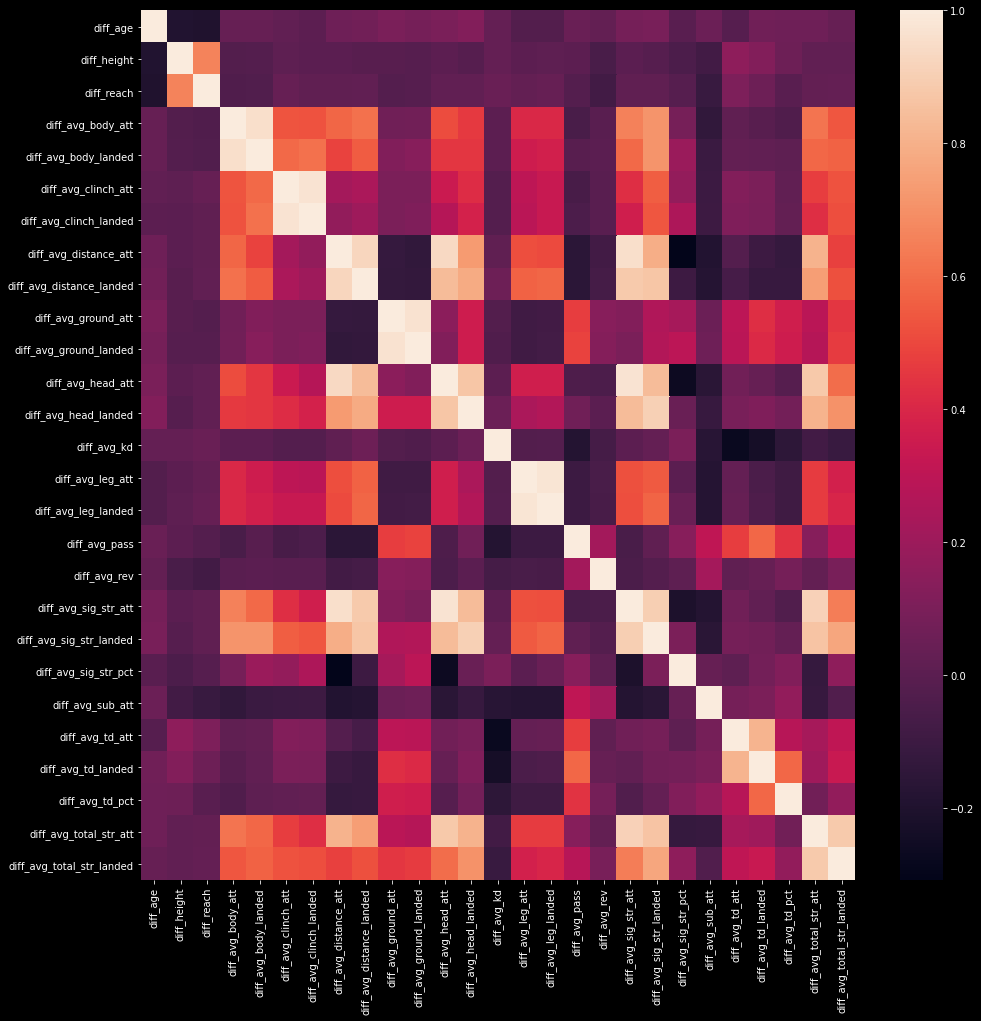

In [14]:
fig, ax = plt.subplots(figsize=(16,16))

sns.heatmap(fddiffs.corr())

In [15]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'winner', data=fddiffs, alpha=0.5)
        ax.set(xlabel=col, ylabel='Winner B or R')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)
        
features = [ii for ii in fddiffs.columns if ii not in ['winner']]
features

['diff_age',
 'diff_height',
 'diff_reach',
 'diff_avg_body_att',
 'diff_avg_body_landed',
 'diff_avg_clinch_att',
 'diff_avg_clinch_landed',
 'diff_avg_distance_att',
 'diff_avg_distance_landed',
 'diff_avg_ground_att',
 'diff_avg_ground_landed',
 'diff_avg_head_att',
 'diff_avg_head_landed',
 'diff_avg_kd',
 'diff_avg_leg_att',
 'diff_avg_leg_landed',
 'diff_avg_pass',
 'diff_avg_rev',
 'diff_avg_sig_str_att',
 'diff_avg_sig_str_landed',
 'diff_avg_sig_str_pct',
 'diff_avg_sub_att',
 'diff_avg_td_att',
 'diff_avg_td_landed',
 'diff_avg_td_pct',
 'diff_avg_total_str_att',
 'diff_avg_total_str_landed']

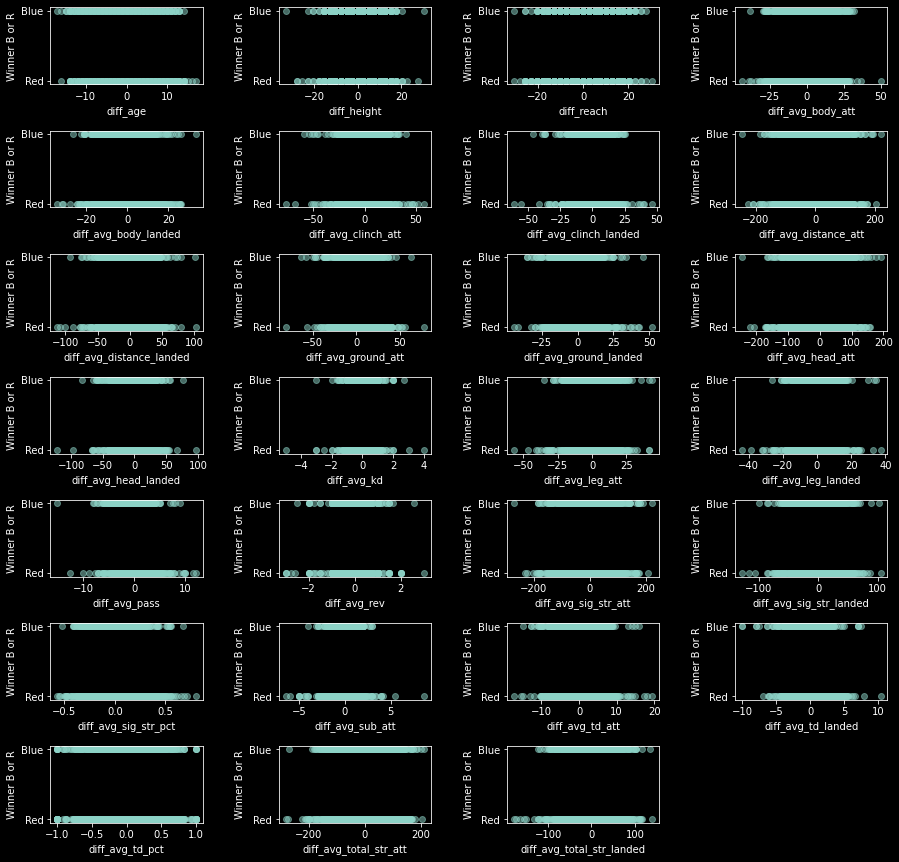

In [16]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [17]:
#how do i add regression lines?

In [18]:
from sklearn.preprocessing import StandardScaler

fdx = fddiffs.drop(['winner'], axis = 1)

scaler = StandardScaler()
fdxscaled = scaler.fit_transform(fdx)
fdxscaled = pd.DataFrame(fdxscaled, columns = fdx.columns)

fdxscaled.head()

,diff_age,diff_height,diff_reach,diff_avg_body_att,diff_avg_body_landed,diff_avg_clinch_att,diff_avg_clinch_landed,diff_avg_distance_att,diff_avg_distance_landed,diff_avg_ground_att,diff_avg_ground_landed,diff_avg_head_att,diff_avg_head_landed,diff_avg_kd,diff_avg_leg_att,diff_avg_leg_landed,diff_avg_pass,diff_avg_rev,diff_avg_sig_str_att,diff_avg_sig_str_landed,diff_avg_sig_str_pct,diff_avg_sub_att,diff_avg_td_att,diff_avg_td_landed,diff_avg_td_pct,diff_avg_total_str_att,diff_avg_total_str_landed
0,-0.123388,0.772824,0.928505,1.409259,1.593677,1.724262,1.550987,0.244262,0.306226,0.530198,0.517414,0.572082,0.796057,-0.933070,-0.330960,-0.309700,0.352672,0.040708,0.666893,0.937498,-0.037928,-0.351885,1.235944,0.994533,1.077397,1.034627,1.294699
1,0.260675,0.374061,0.012259,-0.296975,-0.208026,-0.226287,-0.032367,-0.747970,-0.318962,1.348077,1.827584,-0.638026,0.304376,-0.049933,0.851806,0.695613,0.412908,0.403340,-0.454651,0.344382,1.111813,-0.318510,1.134347,1.135913,1.135567,0.039828,0.946076
2,0.260675,0.772824,-0.903987,-0.172985,-0.402204,-0.363732,-0.338291,0.629167,0.569122,-0.088650,-0.010359,0.651682,0.773193,-1.032779,-0.071964,-0.195414,-0.386351,0.133510,0.502266,0.369583,-0.468178,0.752208,-0.393488,-0.228582,-0.109923,0.473311,0.308065
3,-0.507451,1.171587,-0.293156,0.132372,-0.569459,-0.767665,-0.922386,-0.100790,-0.413493,-1.135945,-1.360591,-0.827920,-1.914573,-0.325913,1.235750,1.421288,-0.266628,-0.593899,-0.482330,-1.113829,-1.233446,-0.293478,-0.115289,-0.443575,-0.632638,-0.620540,-1.026063
4,1.220833,-1.220992,-0.598572,-1.038573,-1.180946,0.886046,0.755357,-3.052222,-1.837113,-0.028137,-0.005161,-3.064272,-1.435663,1.053988,0.184908,0.127091,0.062787,0.040708,-2.700045,-1.314940,1.491033,-0.001440,0.098064,-0.056987,-0.052630,-2.312624,-0.833853


In [19]:
fdy = pd.get_dummies(fddiffs['winner']).iloc[:, 1]
fdy = pd.DataFrame(fdy)
fdy.columns = ['Red Wins']

fdy.head()

,Red Wins
0,1
1,1
2,1
3,0
4,0


from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.2, random_state = 42)

#may need to balance sample, too many of these samples have red lose (balanced using SMOTE)

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(fdxscaled, fdy)

print(y.describe())

          Red Wins
count  4046.000000
mean      0.500000
std       0.500062
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000


In [21]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.2, random_state = 42)

#may need to balance sample, too many of these samples have red lose (balanced using SMOTE)

from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(fdxscaled, fdy, test_size = 0.2, random_state = 42)

#applying SMOTE only to training set

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pg = {'n_neighbors':np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(estimator = knn, param_grid = pg, cv = 5)
knn_cv.fit(X, y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7039210120709914
Best Parameters: {'n_neighbors': 1}


In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(knn_cv.best_params_['n_neighbors'])
knn.fit(xte, yte)
ypr = knn.predict(xte)
print(confusion_matrix(yte, ypr), classification_report(yte, ypr))

#no false positives with higher number of neighbors? why? aka red was never predicted to win when they actually didnt
#the data seems very unbalanced which is the reason knn tends toward predicting fighter losses
#try using SMOTE to balance the dataset! 
#SMOTE would prob badly influence knn since they both operate on the principle of predicting using distance metrics

#after balancing using SMOTE kNN seems to be 100% accurate??

[[415   0]
 [  0 395]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       1.00      1.00      1.00       395

    accuracy                           1.00       810
   macro avg       1.00      1.00      1.00       810
weighted avg       1.00      1.00      1.00       810



pg = {'n_neighbors':np.arange(1, 360)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(estimator = knn, param_grid = pg, cv = 5)
knn_cv.fit(fdxscaled, fdy)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

knn = KNeighborsClassifier(110)
knn.fit(xte, yte)
ypr = knn.predict(xte)
print(confusion_matrix(yte,ypr), classification_report(yte, ypr))

#after using gridsearch the 'optimized' algorithm predicts that red loses every time
#try plotting decision boundary

#knn prob doesn't work bc the result variable is arbitrary 
#(whether the red fighter wins or loses is just dependant on how the data is coded)

In [24]:
from sklearn.linear_model import LogisticRegression

pg = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf = LogisticRegression()
clf_cv= GridSearchCV(estimator = clf, param_grid = pg, cv = 5)
clf_cv.fit(X, y)

print("Best Score:" + str(clf_cv.best_score_))
print("Best Parameters: " + str(clf_cv.best_params_))

#seems hardly better than knn

Best Score:0.5991090967357964
Best Parameters: {'C': 10}


In [25]:
clf = LogisticRegression(C = clf_cv.best_params_['C'])
clf.fit(xte, yte)
ypr = clf.predict(xte)
print(confusion_matrix(yte, ypr), classification_report(yte, ypr))

[[265 150]
 [155 240]]               precision    recall  f1-score   support

           0       0.63      0.64      0.63       415
           1       0.62      0.61      0.61       395

    accuracy                           0.62       810
   macro avg       0.62      0.62      0.62       810
weighted avg       0.62      0.62      0.62       810



In [26]:
from sklearn import tree

pg = {'criterion':[
    'entropy', 'gini'], 
    'max_depth':np.arange(1, 10),
    'min_samples_leaf':np.arange(5, 30)}
dtree = tree.DecisionTreeClassifier()
dtree_cv= GridSearchCV(estimator = dtree, param_grid = pg, cv = 5)
dtree_cv.fit(X, y)

print("Best Score:" + str(dtree_cv.best_score_))
print("Best Parameters: " + str(dtree_cv.best_params_))

Best Score:0.6127128446947153
Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 17}


In [27]:
dtree = tree.DecisionTreeClassifier(
    min_samples_leaf = dtree_cv.best_params_['min_samples_leaf'],
    criterion = dtree_cv.best_params_['criterion'], 
    max_depth = dtree_cv.best_params_['max_depth']
)
dtree.fit(xte, yte)
ypr = dtree.predict(xte)
print(confusion_matrix(yte, ypr), classification_report(yte, ypr))

[[315 100]
 [104 291]]               precision    recall  f1-score   support

           0       0.75      0.76      0.76       415
           1       0.74      0.74      0.74       395

    accuracy                           0.75       810
   macro avg       0.75      0.75      0.75       810
weighted avg       0.75      0.75      0.75       810



dtree = tree.DecisionTreeClassifier(
    min_samples_leaf = 30,
    criterion = dtree_cv.best_params_['criterion'], 
    max_depth = 4)
dtree.fit(xte, yte)
ypr = dtree.predict(xte)
print(confusion_matrix(yte, ypr), classification_report(yte, ypr))

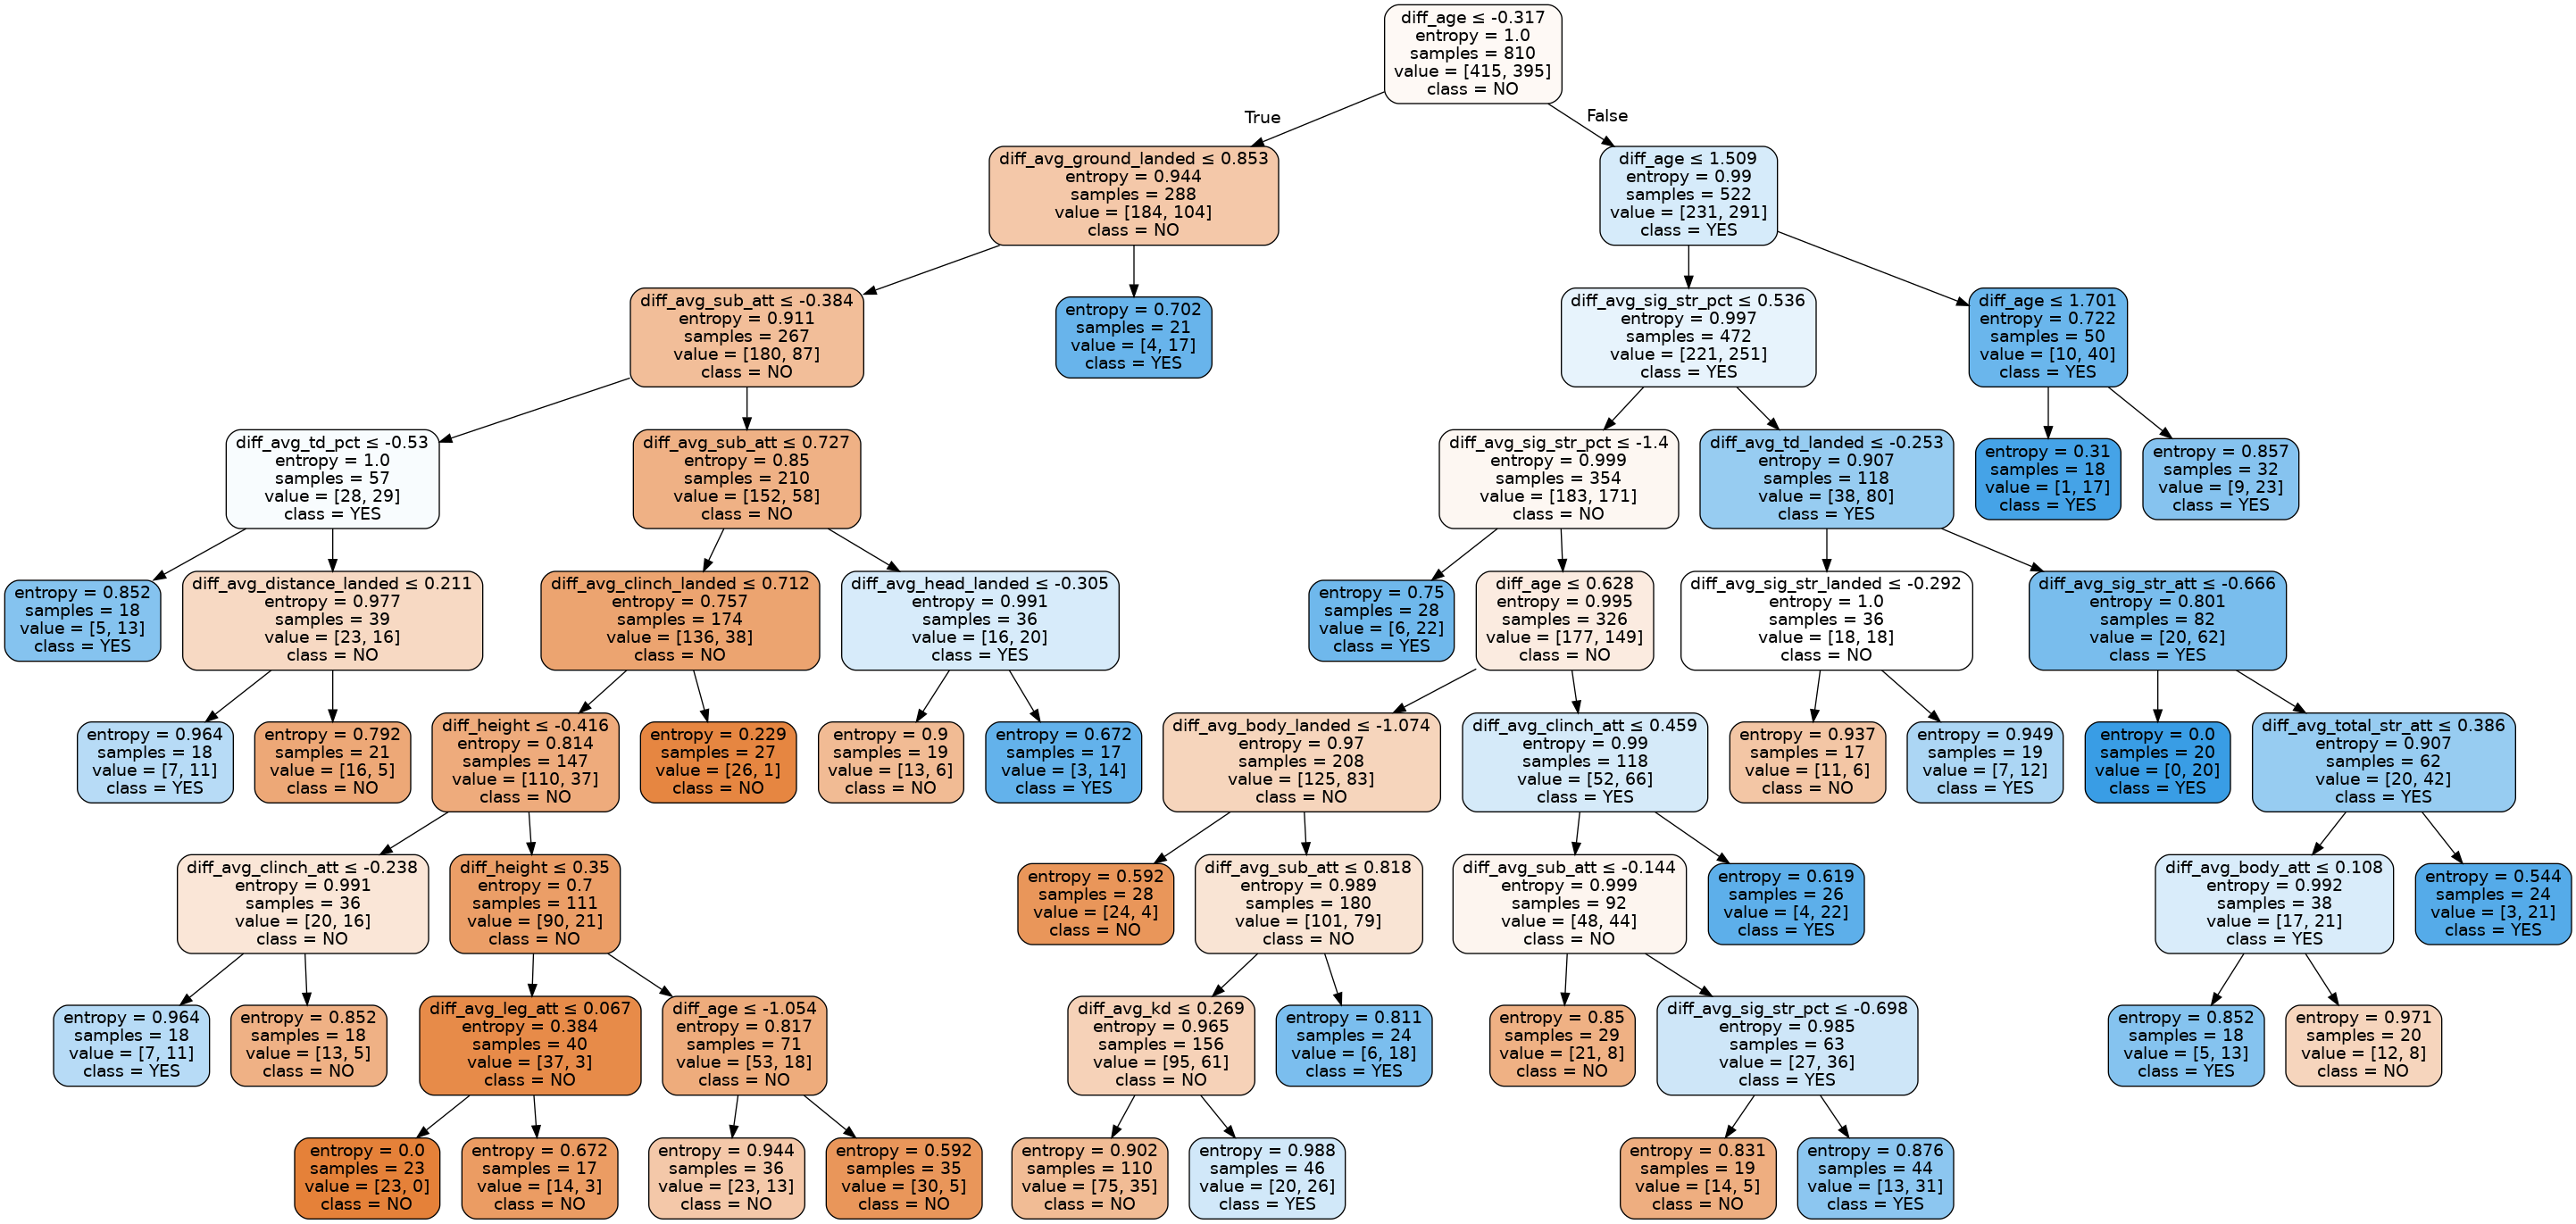

In [28]:
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
tree.export_graphviz(dtree, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names = xtr.columns, class_names = ["NO", "YES"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
from sklearn.ensemble import RandomForestClassifier

pg = {'bootstrap':[True, False], 
      'max_depth':np.arange(2, 10), 
      'min_samples_leaf': np.arange(2, 5), 
      'min_samples_split': np.arange(2, 5)}
forest = RandomForestClassifier(n_estimators = 100)
forest_cv= GridSearchCV(estimator = forest, param_grid = pg, cv = 5)
forest_cv.fit(X, y)

print("Best Score:" + str(forest_cv.best_score_))
print("Best Parameters: " + str(forest_cv.best_params_))

#

Best Score:0.6710476277678584
Best Parameters: {'bootstrap': False, 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [30]:
forest = RandomForestClassifier(n_estimators = 1000, 
                                bootstrap = forest_cv.best_params_['bootstrap'], 
                                max_depth = forest_cv.best_params_['max_depth'], 
                                min_samples_leaf = forest_cv.best_params_['min_samples_leaf'], 
                                min_samples_split = forest_cv.best_params_['min_samples_split'])
forest.fit(xte, yte)
ypr = forest.predict(xte)
print(confusion_matrix(y_true = yte, y_pred = ypr), classification_report(yte, ypr))

#accurately predicted all red losses and predicts most of the red wins, best model so far
#make a single table for all the algorithms to compare the results!

[[415   0]
 [ 20 375]]               precision    recall  f1-score   support

           0       0.95      1.00      0.98       415
           1       1.00      0.95      0.97       395

    accuracy                           0.98       810
   macro avg       0.98      0.97      0.98       810
weighted avg       0.98      0.98      0.98       810



15


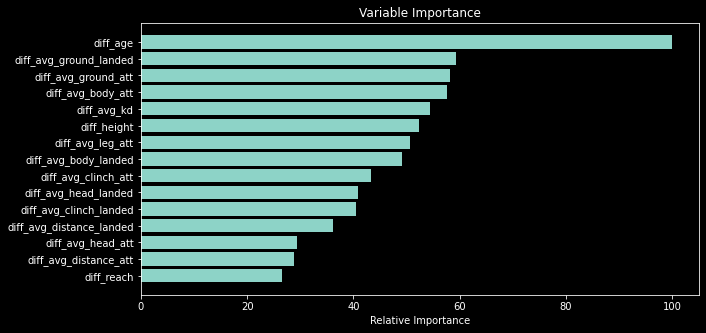

In [31]:
feature_importance = forest.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:15]
sorted_idx = np.argsort(feature_importance)[:15]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,5))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, xtr.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#the data suggests that protecting yourself from strikes and securing takedowns are the key to winning fights! 
#(just as i predicted)

#but after balancing the dataset with SMOTE age seems to be much more important!
#takedowns still seem important tho

#should make some scatterplots with regression lines to see what the trends are for the most important variables

<AxesSubplot:xlabel='diff_age', ylabel='Red Wins'>

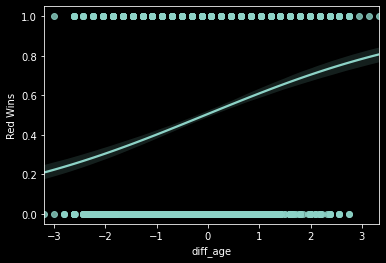

In [36]:
import seaborn as sns
sns.regplot(x = X.diff_age, y = y, logistic=True)

#this shows that older fighters win more suggesting that experience matters more than youth
#look up partial dependency plots
#look up shapely for more plot

<AxesSubplot:xlabel='diff_avg_ground_landed', ylabel='Red Wins'>

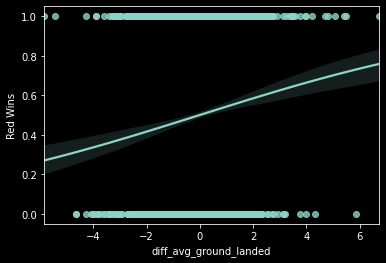

In [37]:
sns.regplot(x = X.diff_avg_ground_landed, y = y, logistic=True)

<AxesSubplot:xlabel='diff_avg_ground_att', ylabel='Red Wins'>

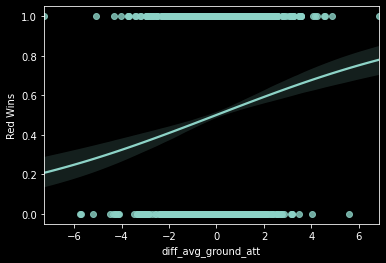

In [38]:
sns.regplot(x = X.diff_avg_ground_att, y = y, logistic=True)

<AxesSubplot:xlabel='diff_avg_body_landed', ylabel='Red Wins'>

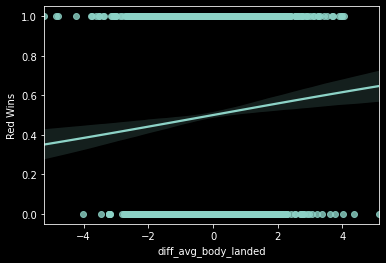

In [39]:
sns.regplot(x = X.diff_avg_body_landed, y = y, logistic=True)